# Workshop 3: Trabalho prático de Classificação

<a id="section_intro"></a>
##  Introdução

Este trabalho consite na aplicação de três modelos de classificação onde utilizamos os dados de pacientes com câncer de mama obtido a partir da atualização de novembro de 2017 do Programa SEER do NCI, que fornece informações sobre estatísticas de câncer de base populacional. O conjunto de dados envolveu pacientes do sexo feminino com câncer de mama de ducto infiltrante e carcinoma lobular (SEER primary cita recode NOS histology codes 8522/3) diagnosticados em 2006-2010. Pacientes com tamanho de tumor desconhecido, LNs regionais examinados, LNs regionais positivos e pacientes cujos meses de sobrevida foram inferiores a 1 mês foram excluídos; assim, 4.024 pacientes foram finalmente incluídos. Onde vamos classificar se o paciente sobrevive ou morre a doença.

## Importando pacotes que serão utilizados:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(style='white')
sns.color_palette('hls', 8)

# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

## Importando os dados que serão utilizados

In [2]:
df = pd.read_csv('../Workshop-3-DS-Digital-House/Breast_Cancer.csv')
df_orig = df.copy()

## Checando dados

In [3]:
df_orig.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Colunas do data set


1. Age - Idade no momento do diagnóstico
2. Race - Raça do paciente
3. Marital Status - Estado Civil
4. T Stage - Indica o tamanho do tumor primário(no ductor mamario) e se dessiminou para a vizinhaça.
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros
5. N Stage - Existência de disseminação da doença para os linfonodos regionais.
6. 6th Stage Grade - combinação de variáveis para denotar o estágio (mesmo campo que GRADE)
7. A Stage - Localidade do cancer (regional ou espalhado pelo corpo)
8. Tumor Size - Tamanho do cancer em milimetros
9. Estrogen Status - Status do estrogênio na paciente (null para casos em que não há cancer de mama)
10. Progesterone Status - Status da progesterona na paciente (null para casos em que não há cancer de mama)
11. Regional Node Examined - Quantidade de nódulos regionais removidos e inspecionados pelo patologista
12. Reginal Node Positive - quantidade de nódulos examinados que contém metastases
13. Survival Months - tempo de sobrevivência
14. Status - Status da paciente (vivo ou morto)

In [4]:
df_orig[['Age','Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


## Removendo, ajustando e manipulando informações

###  removendo coluna "unamed" e renomeando colunas para utilizar

In [5]:
df = df.drop(['Unnamed: 3'], axis=1)
df.rename(columns = {'Race ': 'Race',
                     'Marital Status': 'Marital_Status',
                     'T Stage ': 'T_Stage',
                     'N Stage': 'N_Stage',
                     '6th Stage': '6th_Stage',
                     'A Stage': 'A_Stage',
                     'Tumor Size': 'Tumor_Size',
                     'Estrogen Status': 'Estrogen_Status',
                     'Progesterone Status': 'Progesterone_Status',
                     'Regional Node Examined': 'Regional_Node_Examined',
                     'Reginol Node Positive': 'Regional_Node_Positive',
                     'Survival Months': 'Survival_Months'}, 
            inplace=True)

In [6]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

### checando nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   6th_Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_Stage                 4024 non-null   object
 8   Tumor_Size              4024 non-null   int64 
 9   Estrogen_Status         4024 non-null   object
 10  Progesterone_Status     4024 non-null   object
 11  Regional_Node_Examined  4024 non-null   int64 
 12  Regional_Node_Positive  4024 non-null   int64 
 13  Survival_Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### Manipulando variáveis para ajudar na visualização

In [8]:
# convertendo a categoria 'race'
df['Race'] = df['Race'].replace(
    'Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other'
)

# ajustando categoria Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Married (including common law)', 'Single (never married)'] , ['Married', 'Single']
)

df['Grade'] = df['Grade'].replace(
    ['Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Well differentiated; Grade I', 'Undifferentiated; anaplastic; Grade IV'],
     ['Moderately_differentiated', 'Poorly_differentiated', 'Well_differentiated', 'Undifferentiated']
)

In [9]:
df['Grade'].value_counts()

Moderately_differentiated    2351
Poorly_differentiated        1111
Well_differentiated           543
Undifferentiated               19
Name: Grade, dtype: int64

## Checando variáveis

### Distribuição de idade

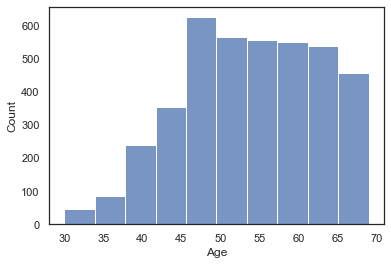

In [10]:
sns.histplot(df, x='Age', bins= 10)
plt.show()

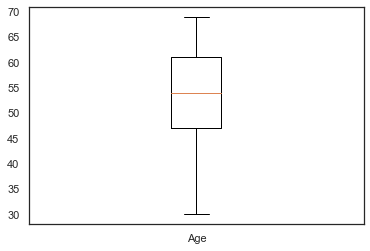

In [11]:
plt.boxplot(df.Age, labels=['Age']);

### Distribuição de etnias

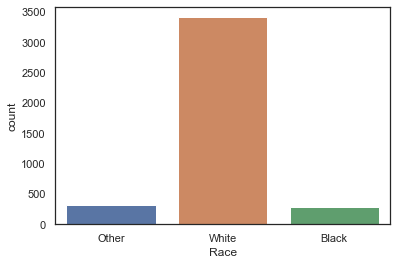

In [12]:
sns.countplot(x='Race', data = df)
plt.show()

### Estado Civil

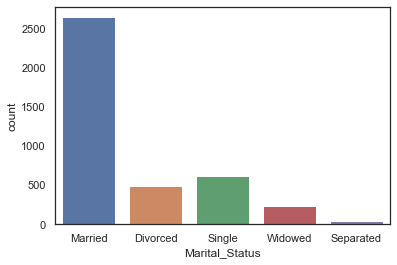

In [13]:
sns.countplot(x='Marital_Status', data = df)
plt.show()

### Estágio do cancer

Lembrando que:
* T Stage - estagio do cancer
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros

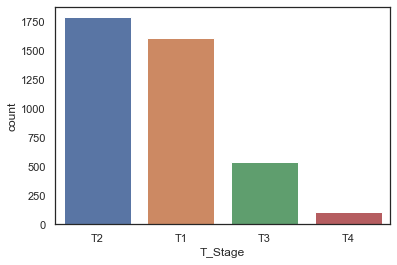

In [14]:
sns.countplot(x='T_Stage', data = df)
plt.show()

### estágio do cancer (análogo à GRADE)

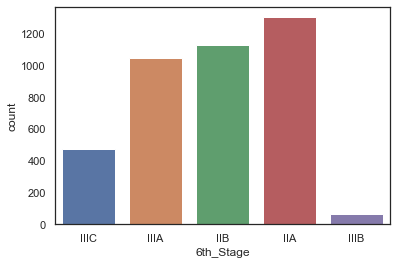

In [15]:
sns.countplot(x='6th_Stage', data = df)
plt.show()

### Diferenciação do tipo de cancer

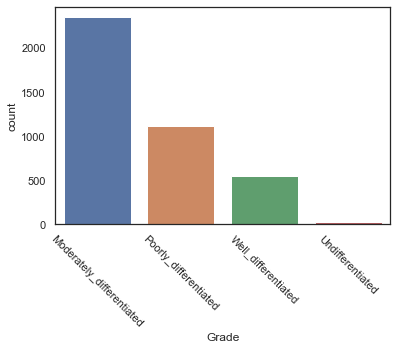

In [16]:
sns.countplot(x='Grade', data = df)
plt.xticks(rotation = -45)
plt.show()

### Classificação da posição do câncer

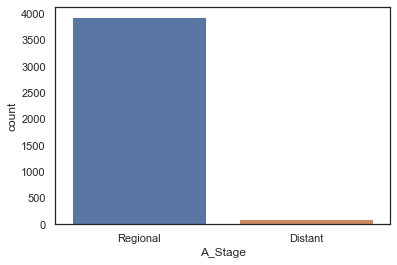

In [17]:
sns.countplot(x='A_Stage', data = df)
plt.show()

### Distribuição de tamanho dos tumores

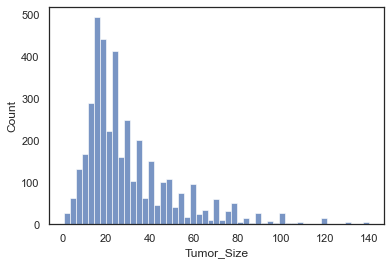

In [18]:
sns.histplot(x='Tumor_Size', data = df)
plt.show()

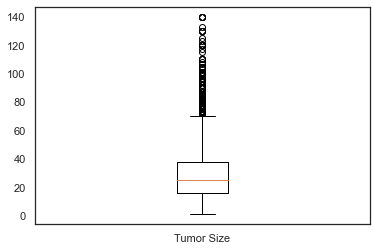

In [19]:
plt.boxplot(df.Tumor_Size, labels=['Tumor Size']);

In [20]:
tumor_size_q1 = df['Tumor_Size'].quantile(0.25)
tumor_size_q3 = df['Tumor_Size'].quantile(0.75)

tumor_size_amp = tumor_size_q3 - tumor_size_q1
tumor_size_limits = [tumor_size_q1 - 1.5 * tumor_size_amp, tumor_size_q3 + 1.5 * tumor_size_amp]

df = df.drop(df[df['Tumor_Size'] > tumor_size_limits[1]].index)
df = df.drop(df[df['Tumor_Size'] < tumor_size_limits[0]].index)

### Status do estrogênio na paciente

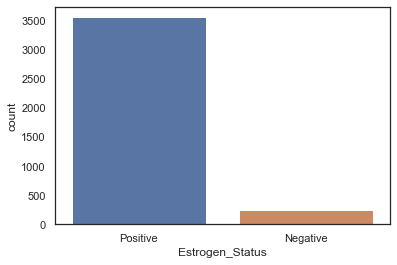

In [21]:
sns.countplot(x = 'Estrogen_Status', data = df)
plt.show()

### Status da progesterona na paciente

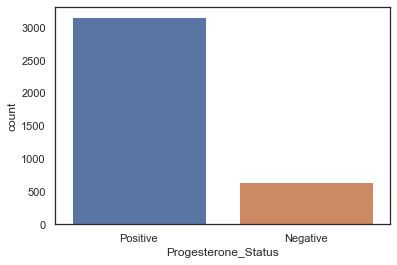

In [22]:
sns.countplot(x = 'Progesterone_Status', data = df)
plt.show()

### Quantidade de nódulos regionais examinados

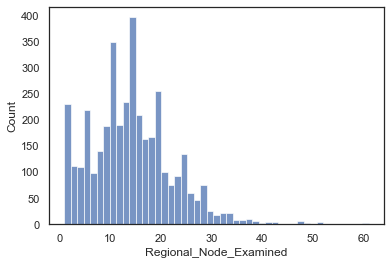

In [23]:
sns.histplot(x = 'Regional_Node_Examined', data = df)
plt.show()

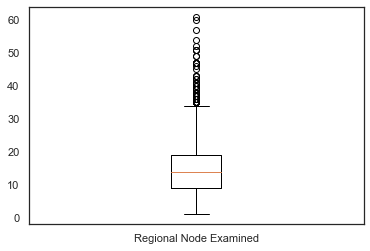

In [24]:
plt.boxplot(df.Regional_Node_Examined, labels=['Regional Node Examined']);

In [25]:
regional_node_exam_q1 = df['Regional_Node_Examined'].quantile(0.25)
regional_node_exam_q3 = df['Regional_Node_Examined'].quantile(0.75)

regional_node_exam_amp = regional_node_exam_q3 - regional_node_exam_q1
regional_node_exam_limits = [regional_node_exam_q1 - 1.5 * regional_node_exam_amp, regional_node_exam_q3 + 1.5 * regional_node_exam_amp]

df = df.drop(df[df['Regional_Node_Examined'] > regional_node_exam_limits[1]].index)
df = df.drop(df[df['Regional_Node_Examined'] < regional_node_exam_limits[0]].index)

### Quantidade de nódulos regionais examinados - positivos para metastase (câncer)

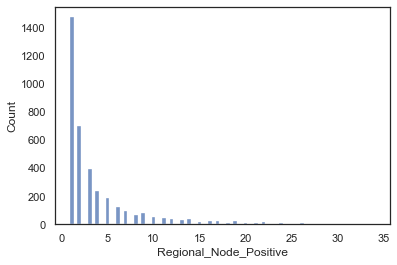

In [26]:
sns.histplot(x = 'Regional_Node_Positive', data = df)
plt.show()

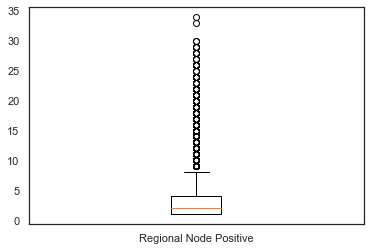

In [27]:
plt.boxplot(df.Regional_Node_Positive, labels=['Regional Node Positive']);

In [28]:
regional_node_pos_q1 = df['Regional_Node_Positive'].quantile(0.25)
regional_node_pos_q3 = df['Regional_Node_Positive'].quantile(0.75)

regional_node_pos_amp = regional_node_pos_q3 - regional_node_pos_q1
regional_node_pos_limits = [regional_node_pos_q1 - 1.5 * regional_node_pos_amp, regional_node_pos_q3 + 1.5 * regional_node_pos_amp]

df = df.drop(df[df['Regional_Node_Positive'] > regional_node_pos_limits[1]].index)
df = df.drop(df[df['Regional_Node_Positive'] < regional_node_pos_limits[0]].index)

### Distribuição de "meses de sobrevivência da paciente"

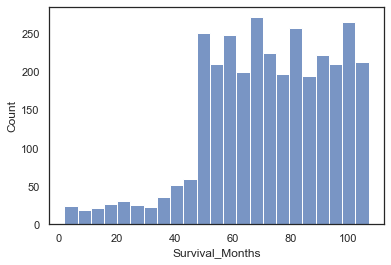

In [29]:
sns.histplot(x = 'Survival_Months', data = df)
plt.show()

### proporção de pacientes vivos/mortos

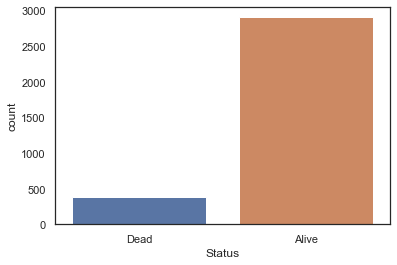

In [30]:
sns.countplot(x = 'Status', data = df)
plt.show()

In [31]:
df.Status.value_counts()

Alive    2902
Dead      383
Name: Status, dtype: int64

In [32]:
print('Dataset após limpeza de outliers: ', df.shape)

Dataset após limpeza de outliers:  (3285, 15)


### Correlações

Legenda Status: Dead = 0, Alive = 1


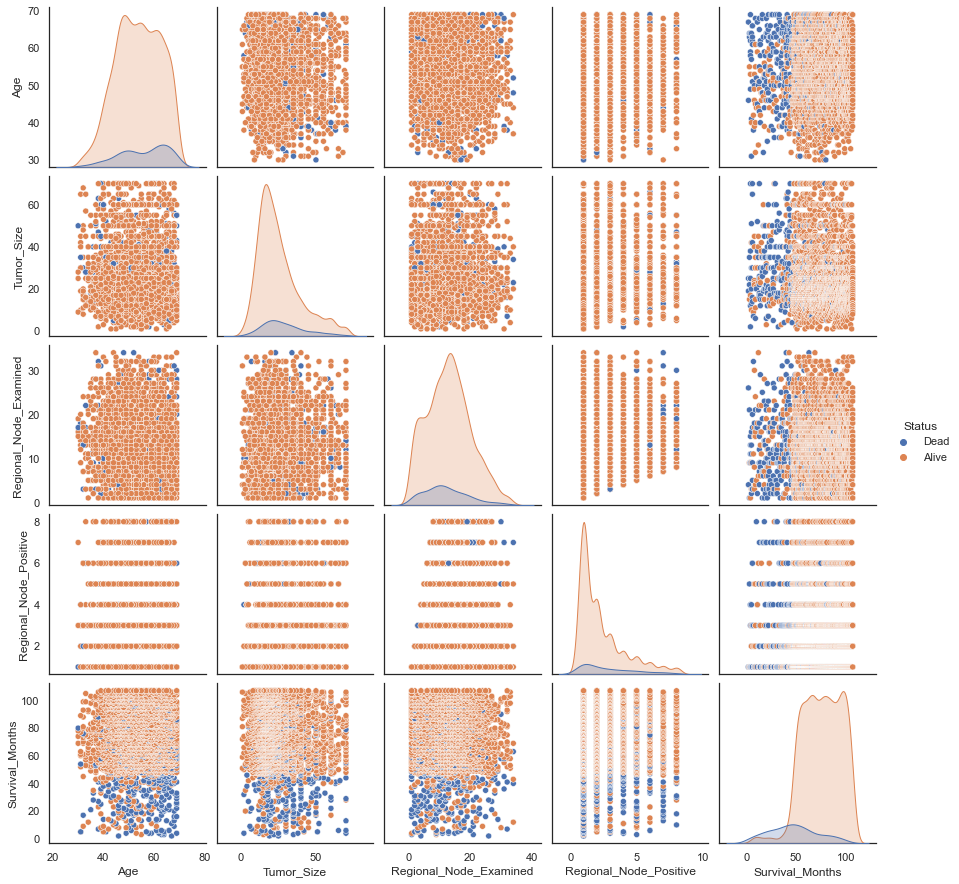

In [33]:
sns.pairplot(df, hue = 'Status')
print('Legenda Status: Dead = 0, Alive = 1')
plt.show()

In [34]:
# Modificando Coluna Status para Dummy (0 = Dead, 1 = Alive)
df['Status'].replace(['Dead','Alive'],[0,1], inplace = True)
df.sample(5)

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Status
1608,58,White,Married,T2,N2,IIIA,Moderately_differentiated,Regional,21,Positive,Positive,27,7,66,1
3269,62,White,Married,T1,N1,IIA,Moderately_differentiated,Regional,12,Positive,Positive,5,1,94,1
2120,36,White,Married,T2,N2,IIIA,Moderately_differentiated,Regional,32,Positive,Positive,5,1,75,1
2071,46,White,Divorced,T2,N1,IIB,Well_differentiated,Regional,30,Positive,Positive,7,2,74,1
2321,46,White,Married,T2,N1,IIB,Moderately_differentiated,Regional,25,Positive,Positive,3,1,78,1


### Correlação entre as variáveis

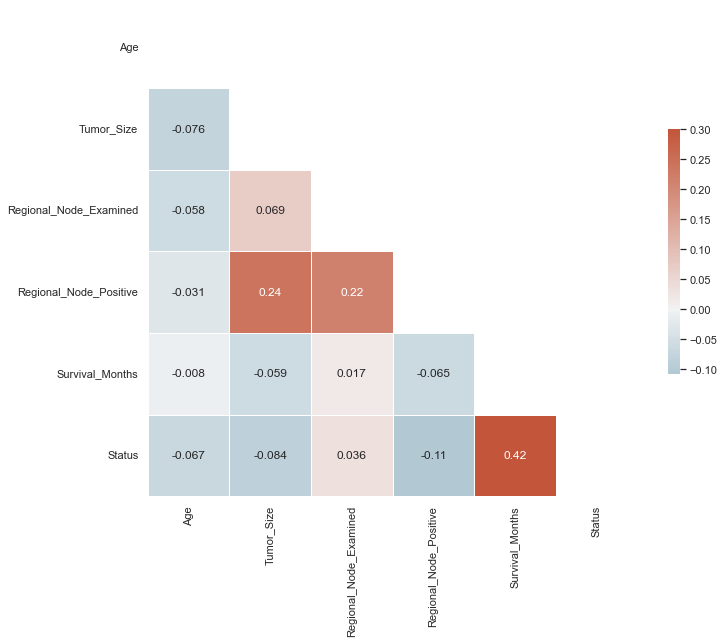

In [35]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Processamento pré-modelagem

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # para normalizar os dados
from sklearn.model_selection import KFold, GridSearchCV# use for cross validation and for tuning parameter

#### Codificação das Variáveis

In [37]:
from sklearn.preprocessing import OrdinalEncoder

#Codificando variáveis categóricas ordinais
ord_enc = OrdinalEncoder(dtype = int)
for col in ['T_Stage', 'N_Stage', '6th_Stage', 'Grade']:
    df[col] = ord_enc.fit_transform(df[col].values.reshape(-1, 1))
    
#Criando dummies para variáveis categóricas não ordinais
df = pd.get_dummies(df, columns = ['Race', 'Marital_Status', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status'], drop_first = True)

#### Lidando com Dataset Assimétrico

In [38]:
#Pegar sample de vivos do mesmo tamanho de mortos (deixar o dataset simétrico)
df_alive = df[df['Status'] == 1]
df_simetrico = pd.concat([df[df['Status'] == 0], df_alive.sample(df['Status'].value_counts()[0], random_state = 42)])

In [39]:
df_simetrico.sample(5)

,Age,T_Stage,N_Stage,6th_Stage,Grade,Tumor_Size,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Status,Race_Other,Race_White,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,A_Stage_Regional,Estrogen_Status_Positive,Progesterone_Status_Positive
561,66,0,0,0,0,20,9,2,49,0,0,1,1,0,0,0,1,1,0
903,68,1,1,2,1,50,11,4,55,0,0,0,1,0,0,0,1,1,1
255,57,1,2,4,0,35,9,4,32,0,0,1,1,0,0,0,1,1,1
466,42,0,0,0,0,17,9,1,47,0,0,1,0,0,0,0,1,1,0
2506,47,1,0,1,1,24,32,1,81,1,0,1,1,0,0,0,1,1,0


In [40]:
df_simetrico.shape

(766, 19)

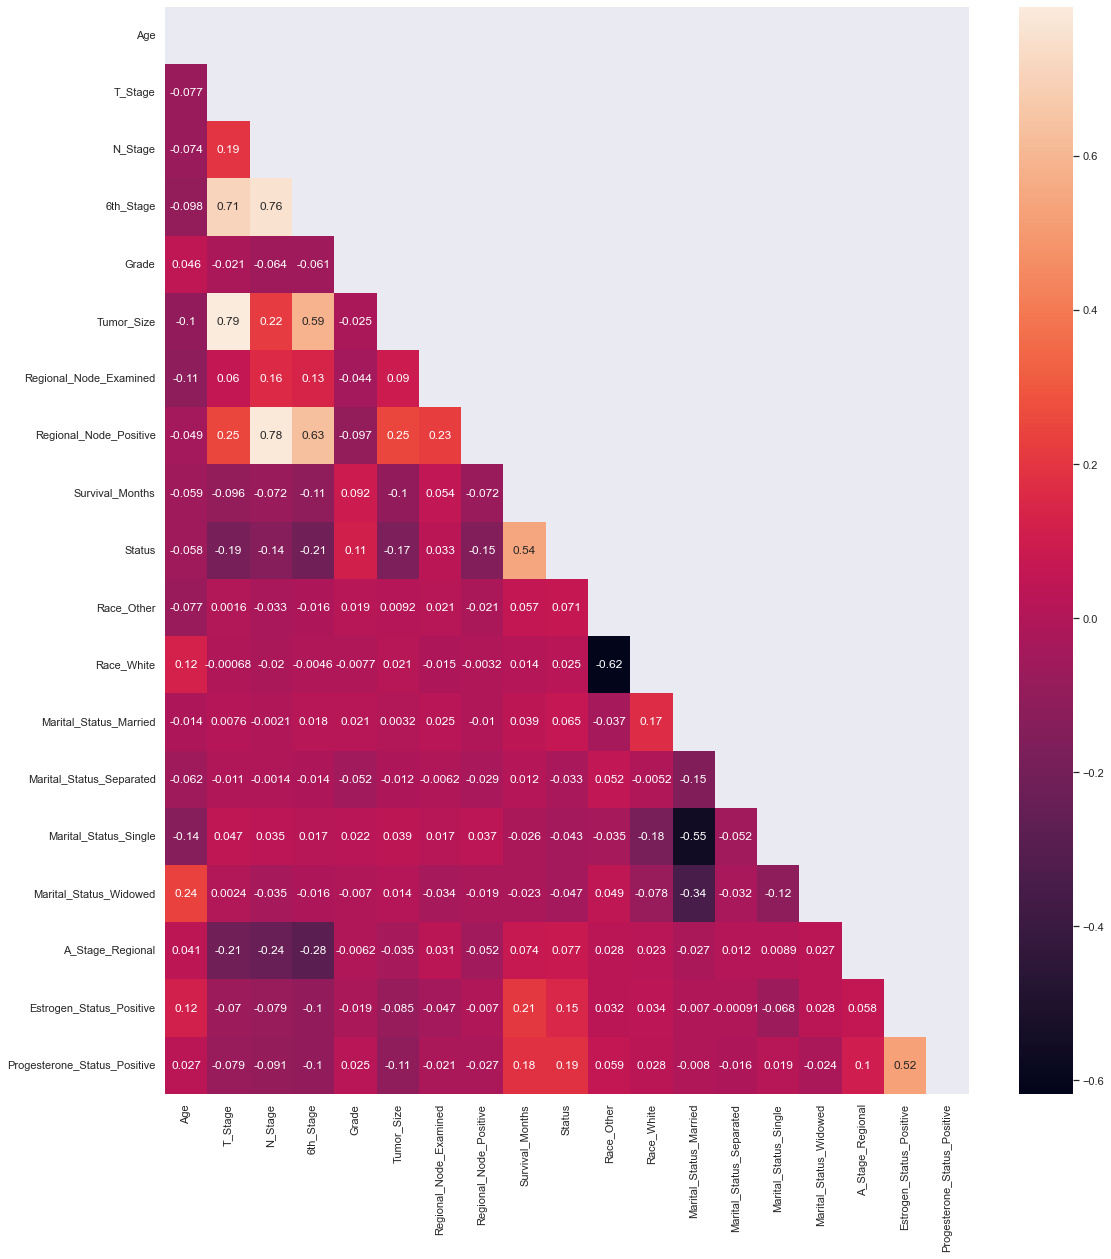

In [41]:
sns.set(rc={'figure.figsize':(18,20)})
sns.heatmap(df_simetrico.corr(), annot=True, mask = np.triu(np.ones_like(df_simetrico.corr(), dtype=bool)));

#### Definindo Features e Target

In [42]:
features = ['Age', 'T_Stage', 'N_Stage', 'Grade', 'Tumor_Size',
            '6th_Stage', 'Regional_Node_Examined', 'Regional_Node_Positive',
            'Survival_Months', 'Race_Other', 'Race_White',
            'Marital_Status_Married', 'Marital_Status_Separated',
            'Marital_Status_Single', 'Marital_Status_Widowed',
            'A_Stage_Regional', 'Progesterone_Status_Positive'
            ]

# Selecionamos as melhores features de acordo com Heatmap final da célula anterior,
# usando o método Summary do StatsModels em um modelo somente para fins de seleção de features (tabela de coeficientes e testes de hipótese)
# e de acordo com a métrica VIF (Variance Inflation Factor), que detecta varíaveis com alta Multicolinearidade

features_seletas = ['N_Stage', 'Tumor_Size',
            'Survival_Months', 'Progesterone_Status_Positive'
            ]

X = df_simetrico[features_seletas]
y = df_simetrico['Status']

#### Splits

In [43]:
# Fazendo Split tanto para Dataset com features JÁ SELECIONADAS quanto para Dataset com todas as features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train_todas_feats, X_test_todas_feats, y_train_todas_feats, y_test_todas_feats = train_test_split(df_simetrico[features], y, test_size = 0.25, random_state = 42)

#### Normalização de variáveis numéricas

In [44]:
numericals_seletas = ['Tumor_Size', 'Survival_Months']

std_scaler = StandardScaler()
X_train_numericals = std_scaler.fit_transform(X_train[numericals_seletas])
X_test_numericals = std_scaler.transform(X_test[numericals_seletas])

# Dropando variáveis numéricas e concatenando elas normalizadas
X_train = X_train.drop(numericals_seletas, axis = 1)
X_train = X_train.join(pd.DataFrame(X_train_numericals, columns = numericals_seletas, index = pd.DataFrame(X_train).index))
X_test = X_test.drop(numericals_seletas, axis = 1)
X_test = X_test.join(pd.DataFrame(X_test_numericals, columns = numericals_seletas, index = pd.DataFrame(X_test).index))

In [45]:
#Repetindo procedimento para X_train_todas_feats e X_test_todas_feats
numericals = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']

X_train_numericals_todas_feats = std_scaler.fit_transform(X_train_todas_feats[numericals])
X_test_numericals_todas_feats = std_scaler.transform(X_test_todas_feats[numericals])

# Dropando variáveis numéricas e concatenando elas normalizadas
X_train_todas_feats = X_train_todas_feats.drop(numericals, axis = 1)
X_train_todas_feats = X_train_todas_feats.join(pd.DataFrame(X_train_numericals_todas_feats, columns = numericals, index = pd.DataFrame(X_train).index))
X_test_todas_feats = X_test_todas_feats.drop(numericals, axis = 1)
X_test_todas_feats = X_test_todas_feats.join(pd.DataFrame(X_test_numericals_todas_feats, columns = numericals, index = pd.DataFrame(X_test).index))

# Modelagem e Validação

In [46]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV # to apply the Logistic regression
from sklearn.neighbors import KNeighborsClassifier # to apply KNN
from sklearn.naive_bayes import GaussianNB # to apply Gaussian Naive Bayes
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from xgboost import XGBClassifier # for XGBoost Ensamble Model

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics # to check the accuracy and Confusion Matrix of the model
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate # Checando o score para selecionar os melhores modelos

c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [47]:
# Criando comparação de acurácia entre os 5 modelos escolhidos

comparacao_modelos = pd.DataFrame(columns = ['Modelo', 'Score'])

modelos = [LogisticRegression(),
           KNeighborsClassifier(),
           GaussianNB(),
           RandomForestClassifier(),
           XGBClassifier(use_label_encoder=False, eval_metric='logloss')
           ]

for model in modelos:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
    comparacao_modelos.loc[len(comparacao_modelos)] = [model_name, scores.mean().round(4)]

comparacao_modelos

c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\xgboost\dat

,Modelo,Score
0,LogisticRegression,0.7231
1,KNeighborsClassifier,0.7054
2,GaussianNB,0.7265
3,RandomForestClassifier,0.6948
4,XGBClassifier,0.6810


In [48]:
def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = data.columns
    
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X_train_todas_feats)

,Var,VIF
3,6th_Stage,22.97
0,T_Stage,14.00
1,N_Stage,10.65
4,Regional_Node_Positive,7.92
6,Race_White,4.69
14,Tumor_Size,2.96
9,Marital_Status_Single,2.41
11,A_Stage_Regional,2.33
12,Progesterone_Status_Positive,2.20
5,Race_Other,1.74


In [49]:
calc_vif(X_train)

,Var,VIF
0,N_Stage,1.27
2,Tumor_Size,1.06
3,Survival_Months,1.03
1,Progesterone_Status_Positive,0.54


### __- Modelo 0:__ Regressão Logística com Regularização Lasso da bib. Stats Models para seleção de features

In [50]:
statsmodels_log_reg = sm.Logit(y_train_todas_feats, X_train_todas_feats).fit_regularized() #FALTA FAZER CROSS VALIDATION!!

log_reg_pred = statsmodels_log_reg.predict(X_test_todas_feats)

statsmodels_log_reg.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4867178695665961
            Iterations: 92
            Function evaluations: 92
            Gradient evaluations: 92


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  574
Model:                          Logit   Df Residuals:                      557
Method:                           MLE   Df Model:                           16
Date:                Mon, 18 Jul 2022   Pseudo R-squ.:                  0.2975
Time:                        16:51:49   Log-Likelihood:                -279.38
converged:                       True   LL-Null:                       -397.70
Covariance Type:            nonrobust   LLR p-value:                 2.816e-41
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
T_Stage                         -0.2644      0.403     -0.656      0.512      -1.054       0.526
N_Stage                         -0.3041      0.607     -0.501      0.616      -1.493       0.885
Grade                            0.1249      0.110      1.138      0.255      -0.090       0.340
6th_Stage                       -0.3099      0.371     -0.835      0.404      -1.037       0.417
Regional_Node_Positive           0.0471      0.092      0.512      0.609      -0.133       0.227
Race_Other                      -0.1091      0.545     -0.200      0.841      -1.178       0.960
Race_White                       0.2670      0.370      0.722      0.470      -0.458       0.991
Marital_Status_Married           0.4785      0.318      1.503      0.133      -0.145       1.102
Marital_Status_Separated        -0.0369      0.897     -0.041      0.967      -1.795       1.721
Marital_Status_Single           -0.1515      0.403     -0.376      0.707      -0.940       0.637
Marital_Status_Widowed           0.0694      0.514      0.135      0.893      -0.939       1.077
A_Stage_Regional                -0.6347      0.535     -1.187      0.235      -1.682       0.413
Progesterone_Status_Positive     0.6588      0.279      2.358      0.018       0.111       1.206
Age                             -0.1510      0.112     -1.351      0.177      -0.370       0.068
Tumor_Size                       0.0068      0.181      0.038      0.970      -0.348       0.362
Regional_Node_Examined           0.0612      0.110      0.559      0.576      -0.154       0.276
Survival_Months                  1.4951      0.141     10.617      0.000       1.219       1.771
================================================================================================
"""

### __- 1º Modelo:__ Regressão Logística usando CV 10 Fold e Regularização Ridge (penalty = 'l2')

In [51]:
log_reg = LogisticRegressionCV(cv = 10, random_state = 42)

log_reg.fit(X_train, y_train)
pred_proba_df = pd.DataFrame(log_reg.predict_proba(X_test))

In [52]:
# log_reg.predict(X_test)

# for k in range(0, strat_kf.get_n_splits() + 1):

In [53]:
log_reg_metric_combo_dict = {}
threshold_list = [.3, .4, .45, .5, .5025, .505, .5075, .51, .52 , .6, .7, .9]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    test_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(test_accuracy))
    test_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(test_recall))
    test_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1))
    print('-> F1-Score: {}'.format(test_f1))
    
    log_reg_metric_combo = (test_accuracy + test_recall + test_f1)/3
    print(f'-> Métrica Combinada: {log_reg_metric_combo}')
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(y_test_pred.iloc[:,1]).reshape(np.asmatrix(y_test_pred.iloc[:,1]).size,1)))
    
    log_reg_metric_combo_dict[i] = log_reg_metric_combo

log_reg_best_thresh = max(log_reg_metric_combo_dict, key=log_reg_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.4 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.45 ******
-> Acurácia: 0.4739583333333333
-> Recall: 1.0
-> F1-Score: 0.6379928315412187
-> Métrica Combinada: 0.7039837216248506
[[  2 101]
 [  0  89]]

******** For i = 0.5 ******
-> Acurácia: 0.734375
-> Recall: 0.9325842696629213
-> F1-Score: 0.7649769585253456
-> Métrica Combinada: 0.810645409396089
[[58 45]
 [ 6 83]]

******** For i = 0.5025 ******
-> Acurácia: 0.7552083333333334
-> Recall: 0.9325842696629213
-> F1-Score: 0.7793427230046949
-> Métrica Combinada: 0.8223784420003165
[[62 41]
 [ 6 83]]

******** For i = 0.505 ******
-> Acurácia: 0.7604166666666666
-> Recall: 0.9101123595505618
-> F1-Score: 0.778846153846154
-

              precision    recall  f1-score   support

           0       0.91      0.60      0.73       103
           1       0.67      0.93      0.78        89

    accuracy                           0.76       192
   macro avg       0.79      0.77      0.75       192
weighted avg       0.80      0.76      0.75       192

Confusion Matrix - Threshold = 0.5025


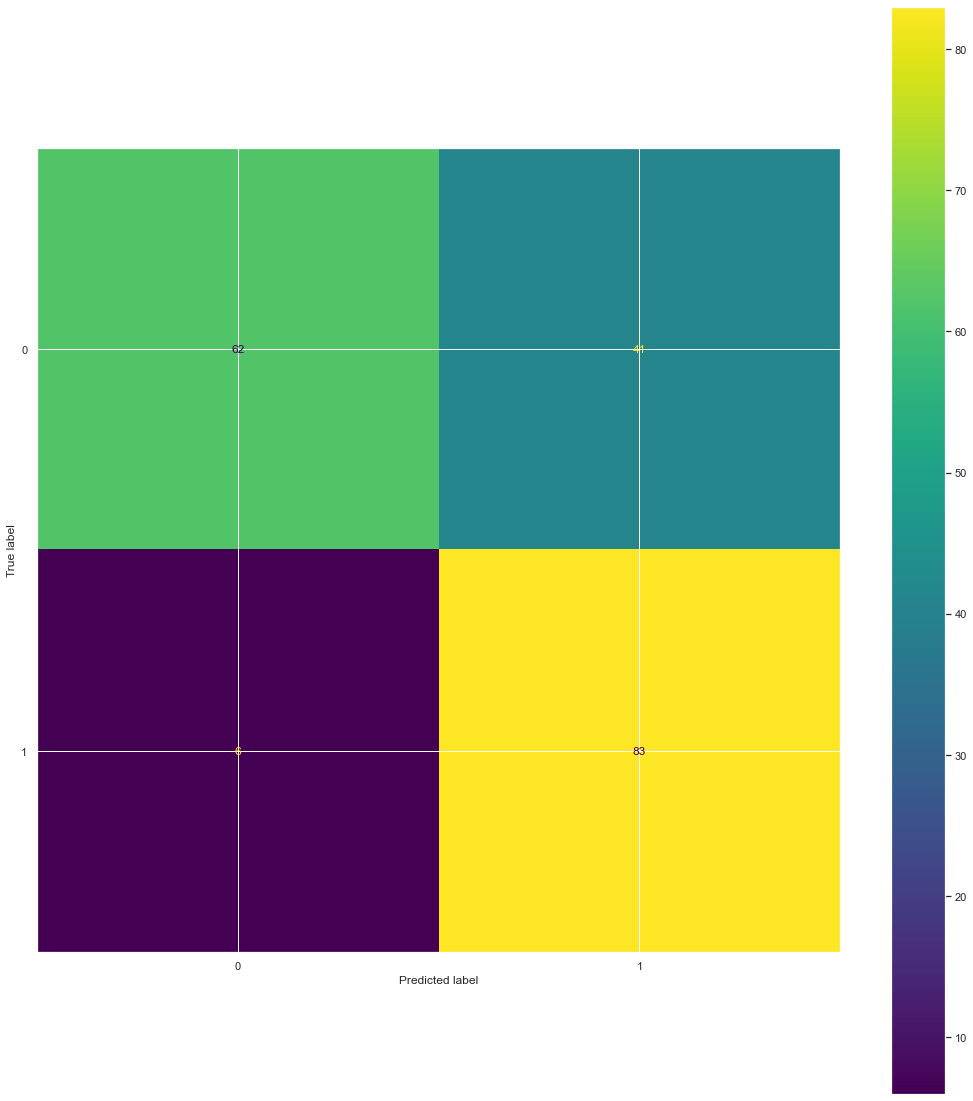

In [54]:
features_e_target = ['Status'].append(features)
log_reg_pred = pred_proba_df.applymap(lambda x: 1 if x > log_reg_best_thresh else 0)

print(metrics.classification_report(y_test, log_reg_pred[1]))
print(f"Confusion Matrix - Threshold = {log_reg_best_thresh}")
ConfusionMatrixDisplay(confusion_matrix(y_test, log_reg_pred[1])).plot();

### __- 2º Modelo:__ KNN usando CV 10 Fold

In [55]:
# Loop para encontrar melhor K

knn_metric_combo_dict = {}

for k in range(1, 100):
    print (f'\n******** For k = {k} ******')
    
    knn = KNeighborsClassifier(n_neighbors = k, p = 3, metric = 'minkowski')
    knn.fit(X_train, y_train)
    
    knn_pred = knn.predict(X_test)
    print(metrics.classification_report(y_test, knn_pred))
    
    knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
    knn_recall = metrics.recall_score(y_test, knn_pred)
    knn_f1 = metrics.f1_score(y_test, knn_pred)
    knn_metric_combo = (knn_accuracy + knn_recall + knn_f1)/3
    print(f'--> Métrica Combinada: {knn_metric_combo}')
    
    knn_metric_combo_dict[k] = knn_metric_combo

knn_best_k = max(knn_metric_combo_dict, key=knn_metric_combo_dict.get)  # Pegar o K com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For k = 1 ******
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       103
           1       0.64      0.73      0.68        89

    accuracy                           0.69       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.69      0.69      0.69       192

--> Métrica Combinada: 0.7006825349891583

******** For k = 2 ******
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       103
           1       0.66      0.55      0.60        89

    accuracy                           0.66       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.66      0.66      0.66       192

--> Métrica Combinada: 0.6044157083170577

******** For k = 3 ******
              precision    recall  f1-score   support

           0       0.79      0.62      0.70       103
           1       0.65      0.81      0.72        89

    accuracy     

In [56]:
print(f'Melhor K: {knn_best_k}')
print(f'Melhor Metric Combo: {knn_metric_combo_dict[knn_best_k]}')
print('\n****** Matriz Confusão - KNN Melhor K ******')
print(confusion_matrix(y_test, knn_pred))

Melhor K: 92
Melhor Metric Combo: 0.7804190467004184

****** Matriz Confusão - KNN Melhor K ******
[[66 37]
 [14 75]]


In [57]:
knn = KNeighborsClassifier(n_neighbors=knn_best_k, p=3, metric='minkowski').fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [58]:
knc_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .5025, .505, .5075, .51, .52, .55, .6, .7, .9]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    knc_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    knc_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(knc_accuracy))
    knc_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(knc_recall))
    knc_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1))
    print('-> F1-Score: {}'.format(knc_f1))
    
    knc_metric_combo = (knc_accuracy + knc_recall + knc_f1)/3
    print(f'-> Métrica Combinada: {knc_metric_combo}')
    
    knc_metric_combo_dict[i] = knc_metric_combo
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(knc_pred.iloc[:,1]).reshape(np.asmatrix(knc_pred.iloc[:,1]).size,1)))

knc_best_thresh = max(knc_metric_combo_dict, key=knc_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.4 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.5 ******
-> Acurácia: 0.734375
-> Recall: 0.9325842696629213
-> F1-Score: 0.7649769585253456
-> Métrica Combinada: 0.810645409396089
[[58 45]
 [ 6 83]]

******** For i = 0.5025 ******
-> Acurácia: 0.7552083333333334
-> Recall: 0.9325842696629213
-> F1-Score: 0.7793427230046949
-> Métrica Combinada: 0.8223784420003165
[[62 41]
 [ 6 83]]

******** For i = 0.505 ******
-> Acurácia: 0.7604166666666666
-> Recall: 0.9101123595505618
-> F1-Score: 0.778846153846154
-> Métrica Combinada: 0.8164583933544609
[[65 38]
 [ 8 81]]

******** For i = 0.5075 ******
-> Acurácia: 0.7604166666666666
-> Recall: 0.8764044943820225
-> F1-Score: 0.77227

              precision    recall  f1-score   support

           0       0.91      0.60      0.73       103
           1       0.67      0.93      0.78        89

    accuracy                           0.76       192
   macro avg       0.79      0.77      0.75       192
weighted avg       0.80      0.76      0.75       192

Confusion Matrix - Threshold = 0.5025


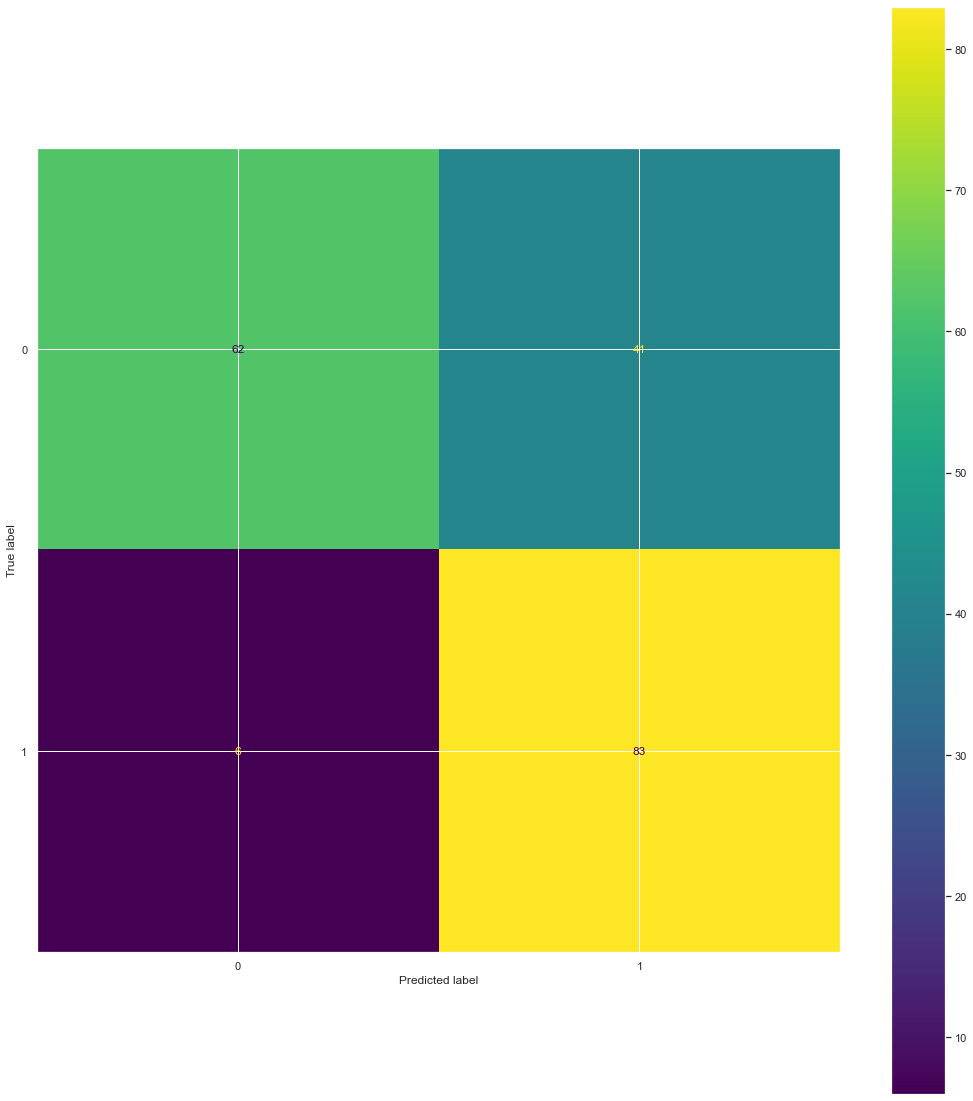

In [59]:
knc_pred = pred_proba_df.applymap(lambda x: 1 if x > knc_best_thresh else 0)

print(metrics.classification_report(y_test, knc_pred[1]))
print(f"Confusion Matrix - Threshold = {knc_best_thresh}")
ConfusionMatrixDisplay(confusion_matrix(y_test, knc_pred[1])).plot();

In [60]:
# # Plotando o KNN e suas Fronteiras de Decisão etc
# 
# styles = ['ob', 'or', 'og', 'oy']

# for c in range(knn_best_k):
#     class_mask = (knn_pred==c)
#     plt.plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=10)
#     plt.plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)
# plt.title('Synthetic data classification - KNN');

### __- 3º Modelo:__ GaussianNB usando CV 10 Fold

In [61]:
# Somente variáveis numéricas para esse modelo, então usaremos X_train_numericals e X_test_numericals

gaussNB = GaussianNB().fit(X_train_numericals, y_train)

gaussNB_metric_combo_dict = {}
threshold_list = [.3, .4, .5, .5025, .505, .5075, .51, .52, .55, .6, .7, .9]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    
    gaussNB_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    gnb_accuracy = metrics.accuracy_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                           np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> Acurácia: {}'.format(gnb_accuracy))
    gnb_recall = metrics.recall_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> Recall: {}'.format(gnb_recall))
    gnb_f1 = metrics.f1_score(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                                         np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1))
    print('-> F1-Score: {}'.format(gnb_f1))
    
    gaussNB_metric_combo = (gnb_accuracy + gnb_recall + gnb_f1)/3
    print(f'-> Métrica Combinada: {gaussNB_metric_combo}')
    
    gaussNB_metric_combo_dict[i] = gaussNB_metric_combo
    
    print(confusion_matrix(np.asmatrix(y_test).reshape(np.asmatrix(y_test).size,1),
                           np.asmatrix(gaussNB_pred.iloc[:,1]).reshape(np.asmatrix(gaussNB_pred.iloc[:,1]).size,1)))

gaussNB_best_thresh = max(gaussNB_metric_combo_dict, key=gaussNB_metric_combo_dict.get)  # Pegar o i com maior valor de combo de métricas (Acurácia, Recall e F1-Score)


******** For i = 0.3 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.4 ******
-> Acurácia: 0.4635416666666667
-> Recall: 1.0
-> F1-Score: 0.6334519572953736
-> Métrica Combinada: 0.6989978746540135
[[  0 103]
 [  0  89]]

******** For i = 0.5 ******
-> Acurácia: 0.734375
-> Recall: 0.9325842696629213
-> F1-Score: 0.7649769585253456
-> Métrica Combinada: 0.810645409396089
[[58 45]
 [ 6 83]]

******** For i = 0.5025 ******
-> Acurácia: 0.7552083333333334
-> Recall: 0.9325842696629213
-> F1-Score: 0.7793427230046949
-> Métrica Combinada: 0.8223784420003165
[[62 41]
 [ 6 83]]

******** For i = 0.505 ******
-> Acurácia: 0.7604166666666666
-> Recall: 0.9101123595505618
-> F1-Score: 0.778846153846154
-> Métrica Combinada: 0.8164583933544609
[[65 38]
 [ 8 81]]

******** For i = 0.5075 ******
-> Acurácia: 0.7604166666666666
-> Recall: 0.8764044943820225
-> F1-Score: 0.77227

              precision    recall  f1-score   support

           0       0.91      0.60      0.73       103
           1       0.67      0.93      0.78        89

    accuracy                           0.76       192
   macro avg       0.79      0.77      0.75       192
weighted avg       0.80      0.76      0.75       192

Confusion Matrix - Threshold = 0.5025


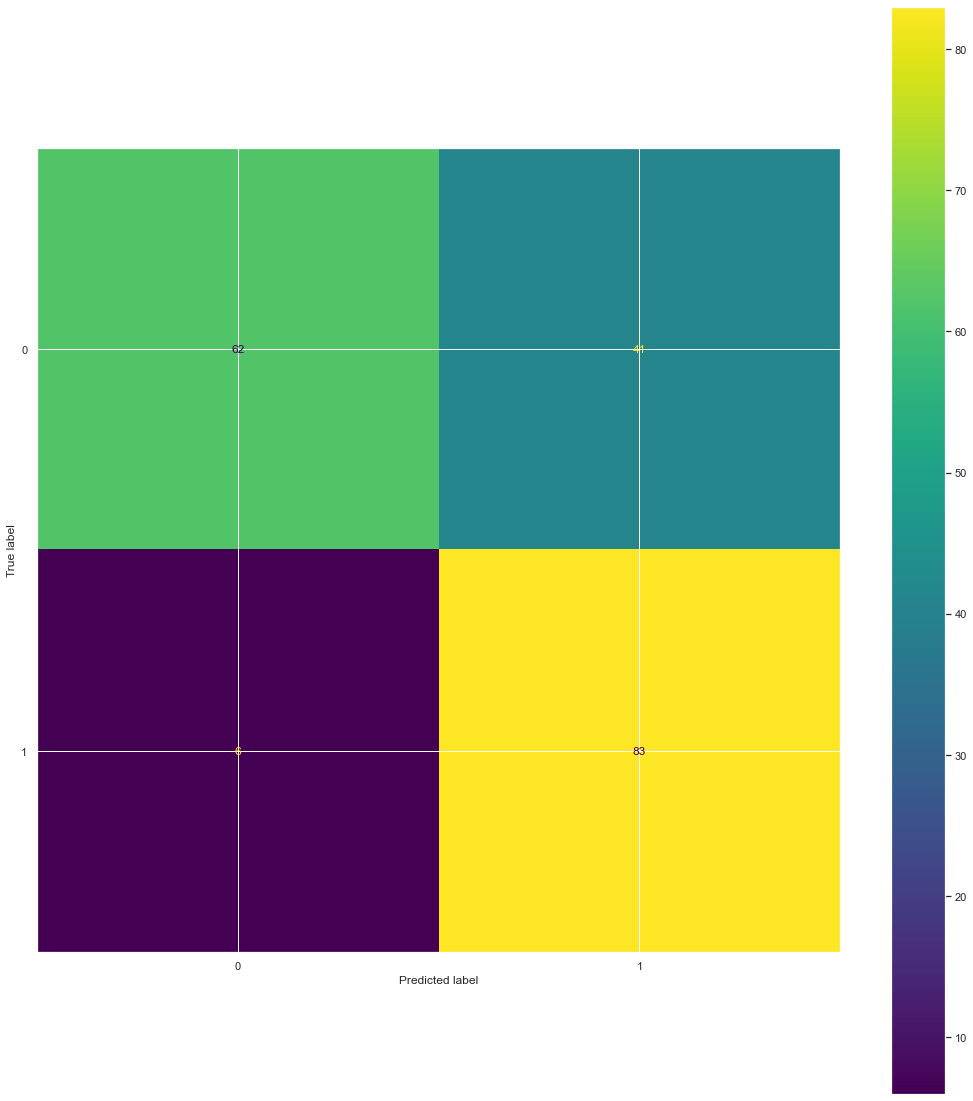

In [62]:
gaussNB_pred = pred_proba_df.applymap(lambda x: 1 if x > gaussNB_best_thresh else 0)

print(metrics.classification_report(y_test, gaussNB_pred[1]))
print(f"Confusion Matrix - Threshold = {gaussNB_best_thresh}")
ConfusionMatrixDisplay(confusion_matrix(y_test, gaussNB_pred[1])).plot();

### __- 4º Modelo:__ Random Forest Classifier usando CV 10 Fold